In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Transform to convert PIL image to tensor
transform = transforms.ToTensor()

# Download and Load MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check First Image & Label
image, label = train_dataset[0]
print("Image Shape:", image.shape)  # (1, 28, 28)
print("Label:", label)  # Integer from 0-9


Image Shape: torch.Size([1, 28, 28])
Label: 5


In [10]:
# Initializing Neural networks
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x)) # Relu for hidden layers
        x = self.relu(self.fc2(x)) # RELU for hidden layers
        x = self.softmax(self.fc3(x)) # Soft max for hidden layers
        return x

In [11]:
# Initialize Model, Loss, and Optimizer
model = MnistModel()
criterion = nn.CrossEntropyLoss() # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

In [15]:
# Train the model
num_epochs = 5 # Number of training cycles

for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(torch.device("cpu")), labels.to(torch.device("cpu"))
        
        optimizer.zero_grad() # Reset gradients
        outputs = model(images) # Forward pass
        loss = criterion(outputs, labels) # compute loss
        loss.backward() # Backpropagation
        optimizer.step() # update weights

        total_loss += loss.item()
    
    print(f"Epoch [{epoch + 1} / {num_epochs}], Loss: {total_loss/len(train_loader):.4f}")

Epoch [1 / 5], Loss: 0.0471
Epoch [2 / 5], Loss: 0.0377
Epoch [3 / 5], Loss: 0.0283
Epoch [4 / 5], Loss: 0.0266
Epoch [5 / 5], Loss: 0.0206


In [17]:
# Testing the model
correct = 0
total = 0

with torch.no_grad():  # No gradient calculation for testing
    for images, labels in test_loader:
        images, labels = images.to(torch.device("cpu")), labels.to(torch.device("cpu"))

        outputs = model(images)  # Get predictions
        _, predicted = torch.max(outputs, 1)  # Get the highest probability class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 97.46%


In [20]:
torch.save(model.state_dict(), "mnist_model.pth") # Save model
model.load_state_dict(torch.load("mnist_model.pth")) # Load model

/tmp/ipykernel_15649/2282144215.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mnist_model.pth")) # Load model


<All keys matched successfully>

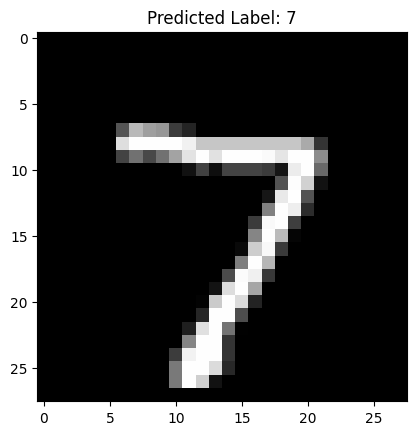

In [22]:
# Make Predictions
import matplotlib.pyplot as plt

# Get a sample from test data
sample_image, sample_label = test_dataset[0]

# Convert image to tensor and add batch dimension
sample_image = sample_image.unsqueeze(0)

# Get model prediction
model.eval()
with torch.no_grad():
    output = model(sample_image)
    predicted_label = torch.argmax(output, 1).item()

# Display the image and prediction
plt.imshow(sample_image.squeeze(), cmap="gray")
plt.title(f"Predicted Label: {predicted_label}")
plt.show()


In [23]:
# Training and Testing and model
# Configuring Neural Network
# Choosing Neural Network architechture and Algo
# Choosing hidden layer algo and output layer algo
# Choosing Loss function
# Train test and prediction

In [ ]:
print("The, End!")